In [1]:
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for selecting support vectors
    verbose : bool
      True if you want to output the learning process.

    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : ndarray of the follwoing form, shape (n_support_vectors,)
      Support vectors index
    self.X_sv :  ndarray of the following form, shape(n_support_vectors, n_features)
      Support vectors features
    self.lam_sv :  ndarray of the following form, shape(n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  ndarray of the following form, shape(n_support_vectors, 1)
      Support vector labels

    """
    
    def __init__(self, num_iter=100, lr=0.01,
                 kernel='linear', ganma=1, d=1,theta=0,threshold=1e-5,
                 verbose=False):
        
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.ganma = ganma
        self.d = d
        self.theta = theta
        
    def _kernel(self,x1,x2):
        """
        Compute kernel functions.
        Parameters
        ----------
        X : ndarray of the following form, shape (n_samples, n_features)
            Training data features
        """
        if self.kernel == 'polly':
            self.ganma = 1
            self.theta = 1
            self.d = 2
            
        return (self.ganma*np.dot(x1,x2.T)+self.theta)**self.d
    
    def _lamda_update(self,X,y):
        
        for i in range(len(X)):
            total = 0
            for j in range(len(X)):
                total += self.lamda[j]*y[i]*y[j]*self._kernel(X[i],X[j])
            
            self.lamda[i] += self.lr*(1-total)
            
            if self.lamda[i] < 0:
                self.lamda[i] = 0
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train an SVM classifier.
        If verification data is input, the accuracy against it is also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features) of the following form
            Training data features
        y : ndarray, shape (n_samples, ) of the following form
            Correct answer value of training data
        X_val : The following form of ndarray, shape (n_samples, n_features)
            Validation data features
        y_val : ndarray, shape (n_samples, ) of the following form
            Correct value of validation data
        """
        
        # Set the initial value of λ
        self.lamda = np.random.rand(len(X))
        
        # Unique value of y
        self.ylabel = np.unique(y)
        # Replace the label value of y with -1,1
        y = np.where(y==self.ylabel[0],-1,1)
        
        for i in range(self.iter):
            self._lamda_update(X,y)
            
            #Outputs the learning process when verbose is set to true.
            if self.verbose:
                print('iter_n:',i,
                      'lamada:',self.lamda)
        
        # Extraction of support vectors, specifications
        self.index_support_vectors = np.where(self.lamda > self.threshold)
        self.X_sv = X[self.lamda > self.threshold]
        self.n_support_vectors = len(self.X_sv)
        self.lam_sv = self.lamda[self.lamda > self.threshold]
        self.y_sv = y[self.lamda > self.threshold]
            
    def predict(self, X):
        """
        Use SVM classifier to estimate labels.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features) of the following form
            Sample

        Returns
        -------
            ndarray, shape (n_samples, 1) of the following form
            Estimation results by SVM classifier
        """
        y_pred = np.zeros(len(X))
        
        for i in range(len(X)):
            total = 0
            for j in range(self.n_support_vectors):
                total += self.lam_sv[j]*self.y_sv[j]*self._kernel(X[i],self.X_sv[j])
            
            if total >= 0:
                y_pred[i] = self.ylabel[1]
            else:
                y_pred[i] = self.ylabel[0]
                
        return y_pred
        
            
         
        
    
                

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(seed=0)

# n_samples = 500
n_samples = 100
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))),
                    np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
sample1_X = X[random_index]
sample1_y = y[random_index]

<ipython-input-3-879957b0253b>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.ones((int(n_samples/2))) *(-1))).astype(np.int)


In [4]:
X=sample1_X[20:40]
y=sample1_y[20:40]
print(X)
print(y)

[[ 2.55988095 -0.09906791]
 [-0.14205902  2.11124362]
 [-1.50642737  2.11125339]
 [-1.16513883  1.40174924]
 [-1.5615169   1.88535921]
 [-1.585383    0.94523063]
 [-1.00408384  2.76905831]
 [-2.46267867 -0.08076347]
 [-0.17950815  3.39022454]
 [ 0.63968522 -3.21271245]
 [-2.54738211  1.21306967]
 [-2.69336749 -0.61318911]
 [ 2.4982956   0.72754957]
 [ 1.91346848 -2.09976175]
 [ 1.00740032 -1.47176993]
 [ 3.43738711 -0.53961192]
 [ 3.14206286  0.31096066]
 [ 0.31731679  2.22551981]
 [ 2.7656298   0.19670802]
 [-0.55952028 -2.96217901]]
[-1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1]


In [5]:
lamda=np.random.rand(len(X))
lamda.reshape(-1,1)
XX=np.array(([1,2],[1,2],[2,4],[2,4]))
np.dot(XX[1],XX.T)


array([ 5,  5, 10, 10])

In [6]:
num_iter=100
def _(self):
    for _ in range(num_iter):
        for i in range(len(X)):
            total=0
        for j in range(len(X)):
            total+=self.lamda[j]*y[i]*y[j]*np.dot(X[i]*X[j])
        lamda[i]+=0.01*(1-total)
        if lamda[i]<0:
           lamda[i]=0
    print('lamda:\n',lamda.reshape(-1,1))          

In [7]:
a=np.dot(X[0],X.T)
print(a)

[ 6.56280495 -0.57281068 -4.06543221 -3.12148507 -4.18407598 -4.15203376
 -2.84465992 -6.29616316 -0.79538197  1.95579473 -6.64117124 -6.83395278
  6.32326249  5.10627053  2.72463005  8.85276001  8.01250064  0.5918156
  7.06019559 -1.13884843]


In [8]:
b=lamda*y[0]*y
print(b)

[ 0.52459262 -0.44201532 -0.85263492 -0.43343897 -0.82687037 -0.50934207
 -0.08637698 -0.66003986 -0.20659461  0.84727532 -0.68135913 -0.17836735
  0.06985902  0.00968817  0.89204966  0.13346521  0.77919197 -0.92516343
  0.71517875  0.49081861]


In [9]:
a*b

array([ 3.44279905,  0.25319109,  3.46632948,  1.35297329,  3.45968845,
        2.11480545,  0.24571313,  4.15571866,  0.16432163,  1.65709661,
        4.52502265,  1.21895404,  0.4417369 ,  0.04947042,  2.43050531,
        1.18153547,  6.24327619, -0.54752615,  5.04930185, -0.558968  ])

In [10]:
np.sum(a*b)

40.34594553412331

In [11]:
np.dot(a,b)

40.3459455341233

In [12]:
c=np.dot(X,X.T)
print(c.shape)

(20, 20)


In [13]:
d=lamda*y*y.T
print(d.shape)

(20,)


In [14]:
np.dot(c,d)

array([ -0.47243793,   8.12142821,   8.1702798 ,   5.43049162,
         7.30383596,   3.69051268,  10.68113513,  -0.22237337,
        13.03961   , -12.37365666,   4.75459615,  -2.26094686,
         2.70756697,  -8.14066502,  -5.69403166,  -2.19743562,
         1.08302356,   8.54430966,   0.65726512, -11.36761514])

In [15]:
threshold=1e-5
spt_vec=X[lamda>threshold]
print(spt_vec)

[[ 2.55988095 -0.09906791]
 [-0.14205902  2.11124362]
 [-1.50642737  2.11125339]
 [-1.16513883  1.40174924]
 [-1.5615169   1.88535921]
 [-1.585383    0.94523063]
 [-1.00408384  2.76905831]
 [-2.46267867 -0.08076347]
 [-0.17950815  3.39022454]
 [ 0.63968522 -3.21271245]
 [-2.54738211  1.21306967]
 [-2.69336749 -0.61318911]
 [ 2.4982956   0.72754957]
 [ 1.91346848 -2.09976175]
 [ 1.00740032 -1.47176993]
 [ 3.43738711 -0.53961192]
 [ 3.14206286  0.31096066]
 [ 0.31731679  2.22551981]
 [ 2.7656298   0.19670802]
 [-0.55952028 -2.96217901]]


In [16]:
spt_index=np.where(lamda>threshold)
print(spt_index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),)


In [17]:
spt_lamda=lamda[lamda>0]
spt_y=y[lamda>0]
print(spt_lamda)
print(spt_y)


[0.52459262 0.44201532 0.85263492 0.43343897 0.82687037 0.50934207
 0.08637698 0.66003986 0.20659461 0.84727532 0.68135913 0.17836735
 0.06985902 0.00968817 0.89204966 0.13346521 0.77919197 0.92516343
 0.71517875 0.49081861]
[-1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1]


In [18]:
X_test=X[0:5]
X_test

array([[ 2.55988095, -0.09906791],
       [-0.14205902,  2.11124362],
       [-1.50642737,  2.11125339],
       [-1.16513883,  1.40174924],
       [-1.5615169 ,  1.88535921]])

In [19]:
for i in range(len(X_test)):
    total=0
    for j in range (len(spt_vec)):
        total+=spt_lamda[j]*spt_y[j]*np.dot(X_test[i],spt_vec[j])
    if  total>0:
        print('f(X):{:.1f}.class:{}'.format(total,1))
    else:
        print('f(X):{:.1f}.class:{}'.format(total,-1))

f(X):-40.3.class:-1
f(X):32.2.class:1
f(X):53.0.class:1
f(X):37.7.class:1
f(X):50.6.class:1


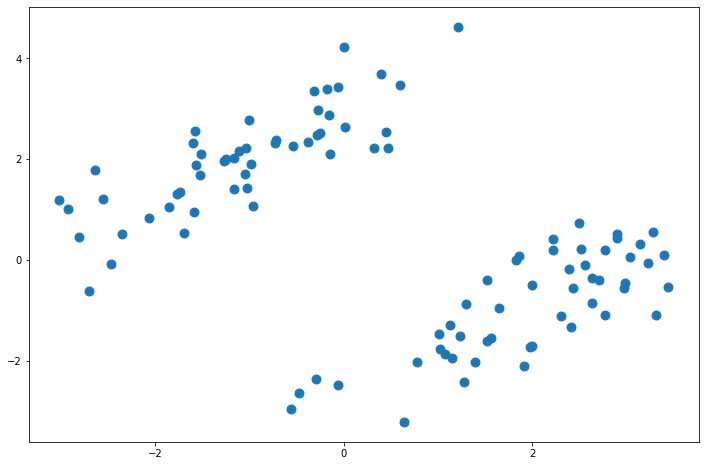

In [20]:
fig=plt.subplots(figsize=(12,8))
plt.rcParams["font.size"]=28
plt.scatter(sample1_X[:,0],sample1_X[:,1],s=80);

In [21]:
from sklearn.model_selection import train_test_split
sample1_X
sample1_y
X_train1,X_valid1, y_train1,y_valid1=\
train_test_split(X,y,train_size=0.8,random_state=None)

print('X_train.shape',X_train1.shape)
print(y_train1.shape)
print(X_valid1.shape)
print(y_valid1.shape)

X_train.shape (16, 2)
(16,)
(4, 2)
(4,)


In [22]:
clf1=ScratchSVMClassifier(num_iter=100,lr=0.01,)

clf1.fit(X_train1,y_train1)
y_pred1=clf1.predict(X_valid1)

In [23]:
Show=False
if Show:
    print('pred:',y_pred1)
    print('vali:',y_valid1)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import f1_score
accuracy=accuracy_score(y_valid1,y_pred1)
precision=precision_score(y_valid1,y_pred1)
recall=recall_score(y_valid1,y_pred1)
f1=f1_score(y_valid1,y_pred1)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


In [25]:
from sklearn.svm import SVC

clf_sk=SVC()

clf_sk.fit(X_train1,y_train1)
y_pred_sk=clf_sk.predict(X_valid1)

In [26]:
accuracy=accuracy_score(y_valid1,y_pred_sk)
precision=precision_score(y_valid1,y_pred_sk)
recall=recall_score(y_valid1,y_pred_sk)
f1=f1_score(y_valid1,y_pred_sk)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


In [27]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X,y,model,step=0.01,
                    title='decision region',
                    xlabel='xlabel',
                    ylabel='ylabel',
                    target_names=['versicolor', 'virginica']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[:,0],model.X_sv[:,1],color='yellow',s=80,label='support_vector')
    plt.legend(handles=patches)
    plt.legend()
  

Number of support_vector: 4


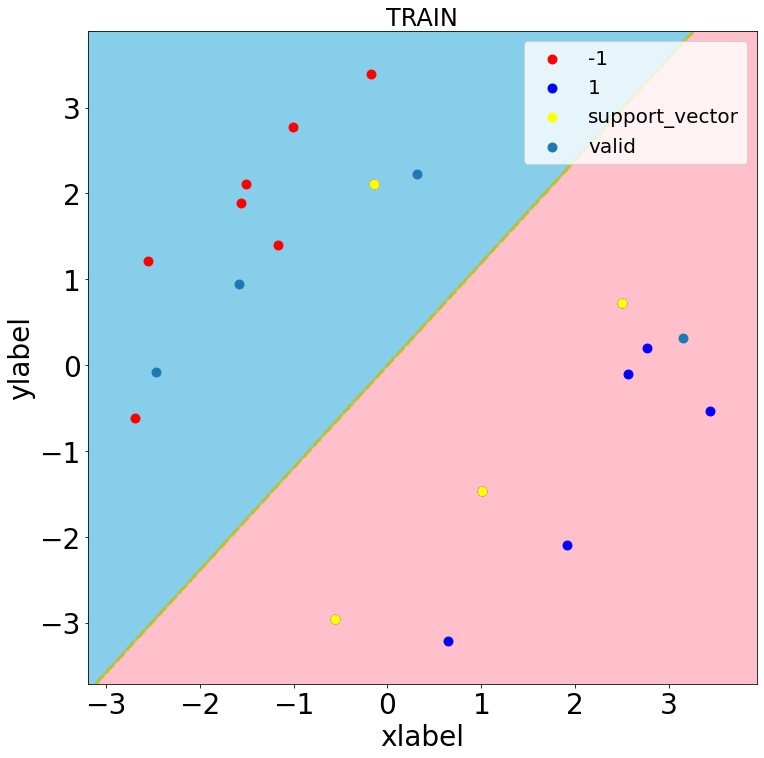

In [28]:
fig,ax=plt.subplots(figsize=(12,12))
plt.rcParams["font.size"]=20
print('Number of support_vector:',clf1.n_support_vectors)
decision_region(X_train1,y_train1,clf1,title='TRAIN',target_names=['-1','1'])
plt.scatter(X_valid1[:,0] ,X_valid1[:,1],s=80,label='valid')
plt.legend();

In [29]:
class ScratchSVMClassifierNumpy():
    def __init__(self, num_iter=100, lr=0.01,
                 kernel='linear', ganma=1, d=1,theta=0,threshold=1e-5,
                 verbose=False):
        
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.ganma = ganma
        self.d = d
        self.theta = theta
        
    def _kernel(self,x1,x2):
        if self.kernel == 'polly':
            self.ganma = 1
            self.theta = 1
            self.d = 2
            
        return (self.ganma*np.dot(x1,x2.T)+self.theta)**self.d
    
    def _lamda_update(self,X,y):
        
        for i in range(len(X)):
            for j in range(len(X)):
                self.lamda[i] += self.lr*(1-np.dot(self.lamda*y[i]*y.T,self._kernel(X[i],X)))
                self.lamda=np.where(self.lamda>=0,self.lamda,0)
        
    def fit(self, X, y, X_val=None, y_val=None):

        self.lamda = np.random.rand(len(X))
        
        # Unique value of y
        self.ylabel = np.unique(y)
        # Replace the label value of y with -1,1
        y = np.where(y==self.ylabel[0],-1,1)
        
        for i in range(self.iter):
            self._lamda_update(X,y)
            
            #Outputs the learning process when verbose is set to true.
            if self.verbose:
                print('iter_n:',i,
                      'lamada:',self.lamda)
        
        # Extraction of support vectors, specifications
        self.index_support_vectors = np.where(self.lamda > self.threshold)
        self.X_sv = X[self.lamda > self.threshold]
        self.n_support_vectors = len(self.X_sv)
        self.lam_sv = self.lamda[self.lamda > self.threshold]
        self.y_sv = y[self.lamda > self.threshold]
            
    def predict(self, X):
        """
        Use SVM classifier to estimate labels.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features) of the following form
            Sample

        Returns
        -------
            ndarray, shape (n_samples, 1) of the following form
            Estimation results by SVM classifier
        """
        y_pred = np.dot(self.lam_sv*self.y_sv,self._kernel(X,self.X_sv).T)

        return np.where(y_pred>=0,self.ylabel[1],self.ylabel[0])
        
        

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
np.random.seed(seed=0)

# n_samples = 500
n_samples = 100
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))),
                    np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
sample1_X = X[random_index]
sample1_y = y[random_index]

<ipython-input-31-879957b0253b>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.ones((int(n_samples/2))) *(-1))).astype(np.int)


In [32]:
X=sample1_X[20:40]
y=sample1_y[20:40]
print(X)
print(y)

[[ 2.55988095 -0.09906791]
 [-0.14205902  2.11124362]
 [-1.50642737  2.11125339]
 [-1.16513883  1.40174924]
 [-1.5615169   1.88535921]
 [-1.585383    0.94523063]
 [-1.00408384  2.76905831]
 [-2.46267867 -0.08076347]
 [-0.17950815  3.39022454]
 [ 0.63968522 -3.21271245]
 [-2.54738211  1.21306967]
 [-2.69336749 -0.61318911]
 [ 2.4982956   0.72754957]
 [ 1.91346848 -2.09976175]
 [ 1.00740032 -1.47176993]
 [ 3.43738711 -0.53961192]
 [ 3.14206286  0.31096066]
 [ 0.31731679  2.22551981]
 [ 2.7656298   0.19670802]
 [-0.55952028 -2.96217901]]
[-1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1]


In [33]:
threshold=1e-5
spt_vec=X[lamda>threshold]
print(spt_vec)


[[ 2.55988095 -0.09906791]
 [-0.14205902  2.11124362]
 [-1.50642737  2.11125339]
 [-1.16513883  1.40174924]
 [-1.5615169   1.88535921]
 [-1.585383    0.94523063]
 [-1.00408384  2.76905831]
 [-2.46267867 -0.08076347]
 [-0.17950815  3.39022454]
 [ 0.63968522 -3.21271245]
 [-2.54738211  1.21306967]
 [-2.69336749 -0.61318911]
 [ 2.4982956   0.72754957]
 [ 1.91346848 -2.09976175]
 [ 1.00740032 -1.47176993]
 [ 3.43738711 -0.53961192]
 [ 3.14206286  0.31096066]
 [ 0.31731679  2.22551981]
 [ 2.7656298   0.19670802]
 [-0.55952028 -2.96217901]]


In [34]:
spt_index=np.where(lamda>threshold)
print(spt_index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),)


In [35]:
spt_lamda=lamda[lamda>0]
spt_y=y[lamda>0]
print(spt_lamda)
print(spt_y)

[0.52459262 0.44201532 0.85263492 0.43343897 0.82687037 0.50934207
 0.08637698 0.66003986 0.20659461 0.84727532 0.68135913 0.17836735
 0.06985902 0.00968817 0.89204966 0.13346521 0.77919197 0.92516343
 0.71517875 0.49081861]
[-1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1]


In [36]:
clfnp=ScratchSVMClassifierNumpy(num_iter=100,lr=0.01,threshold=1e-5)
clfnp.fit(X_train1,y_train1)
y_pred_clfnp=clfnp.predict(X_valid1)

In [37]:
accuracy=accuracy_score(y_valid1,y_pred_clfnp)
precision=precision_score(y_valid1,y_pred_clfnp)
recall=recall_score(y_valid1,y_pred_clfnp)
f1=f1_score(y_valid1,y_pred_clfnp)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


Number of support_vector: 3


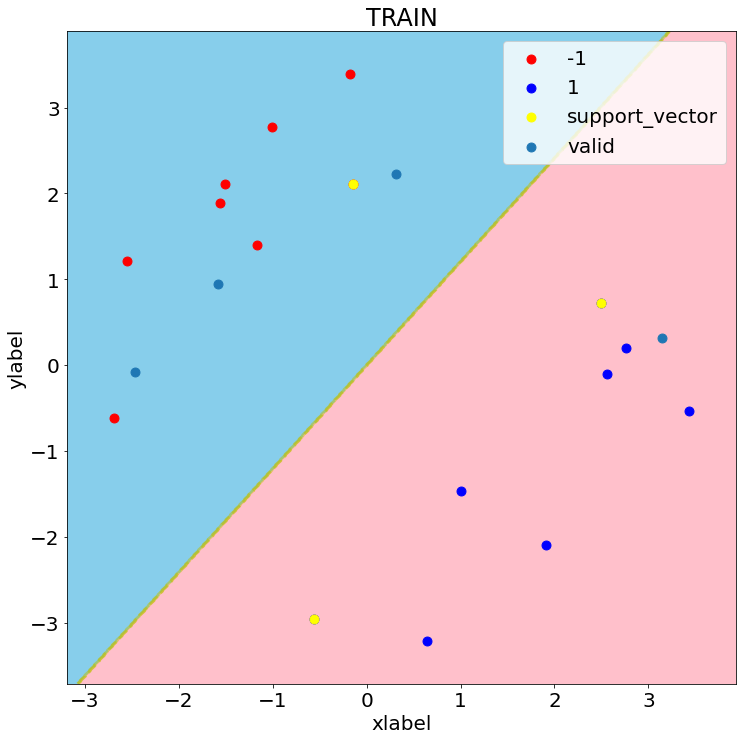

In [38]:
fig,ax=plt.subplots(figsize=(12,12))
plt.rcParams["font.size"]=20
print('Number of support_vector:',clfnp.n_support_vectors)
decision_region(X_train1,y_train1,clfnp,title='TRAIN',target_names=['-1','1'])
plt.scatter(X_valid1[:,0] ,X_valid1[:,1],s=80,label='valid')
plt.legend();

In [39]:
clf4=ScratchSVMClassifierNumpy(kernel='polly',d=2)
clf4.fit(X_train1,y_train1)
y_pred_clfnp=clf4.predict(X_valid1)

Number of support_vector: 5


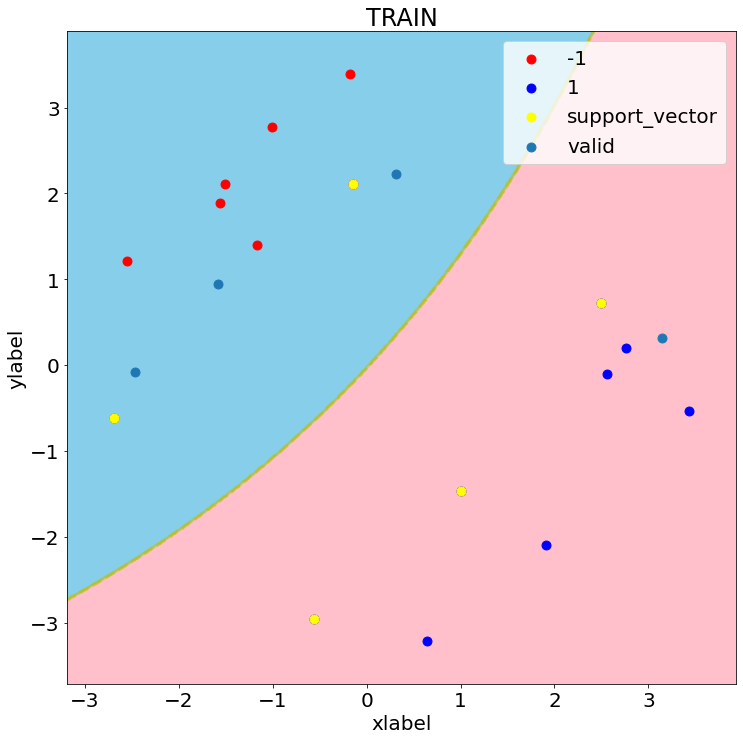

In [40]:
fig,ax=plt.subplots(figsize=(12,12))
plt.rcParams["font.size"]=20
print('Number of support_vector:',clf4.n_support_vectors)
decision_region(X_train1,y_train1,clf4,title='TRAIN',target_names=['-1','1'])
plt.scatter(X_valid1[:,0] ,X_valid1[:,1],s=80,label='valid')
plt.legend();

In [41]:
X=np.array([[2,1],[2,2]])
y=np.array([[3,8],[9,1]])

print('linear:\n',np.dot(X,y))
print('polly:\n',(np.dot(X,y)+1)**2)


linear:
 [[15 17]
 [24 18]]
polly:
 [[256 324]
 [625 361]]


In [42]:
n=300
rs=np.random.random(n)
r=1.0
X1= np.c_[r*np.cos(2*np.pi*rs),r*np.sin(2*np.pi*rs)]
Y1= [-1 for _ in range(n)]

rs=np.random.random(n)
r=2.0
X2=np.c_[r*np.cos(2*np.pi*rs),r*np.sin(2*np.pi*rs)]
Y2= [ 1 for _ in range(n)]
X=np.r_[X1,X2]
y=np.r_[Y1,Y2]


In [43]:

X_train3,X_valid3,y_train3,y_valid3=\
train_test_split(X, y, train_size=0.8,random_state=0)
print('X_train3.shape',X_train3.shape)
print('y_train3.shape',y_train3.shape)
print ('X_valid3.shape',X_valid3.shape)
print('y_valid3.shape',y_valid3.shape)


X_train3.shape (480, 2)
y_train3.shape (480,)
X_valid3.shape (120, 2)
y_valid3.shape (120,)


In [44]:
clf3=ScratchSVMClassifierNumpy(kernel='polly',d=2)
clf3.fit(X_train3,y_train3)
y_pred3=clf3.predict(X_valid3)

Number of support_vector: 35


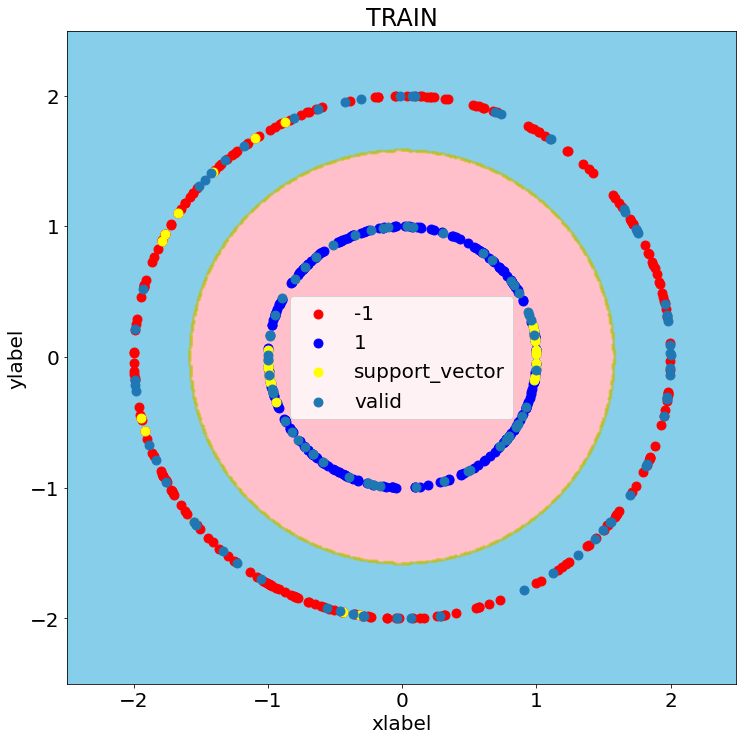

In [45]:
fig,ax=plt.subplots(figsize=(12,12))
plt.rcParams["font.size"]=20
print('Number of support_vector:',clf3.n_support_vectors)
decision_region(X_train3,y_train3,clf3,title='TRAIN',target_names=['-1','1'])
plt.scatter(X_valid3[:,0] ,X_valid3[:,1],s=80,label='valid')
plt.legend();

In [46]:
from scipy.special import comb
def poly_feature(X,d):
    z=np.zeros((X.shape[0],d+1))

    for i in range(d+1):
        a=np.sqrt(comb(d,i,exact=True))
        z[:,i]=a*(X[:,0]**(d-i))*(X[:,1]**(i))
    return z

In [47]:
import pandas as pd
d=2
columns=['feature'+str(i) for i in range(d+1)]
z=pd.DataFrame(poly_feature(X,d),columns=columns)
y=pd.DataFrame(y).rename(columns={0:'class'})
z=pd.concat([z,y],axis=1)

In [48]:
z

,feature0,feature1,feature2,class
0,0.209599,-0.575617,0.790401,-1
1,0.363440,0.680223,0.636560,-1
2,0.287849,0.640300,0.712151,-1
3,0.472291,0.706020,0.527709,-1
4,0.773605,0.591845,0.226395,-1
...,...,...,...,...
595,2.413705,-2.767254,1.586295,1
596,0.368366,1.635709,3.631634,1
597,3.471239,-1.915963,0.528761,1
598,0.281132,1.446023,3.718868,1


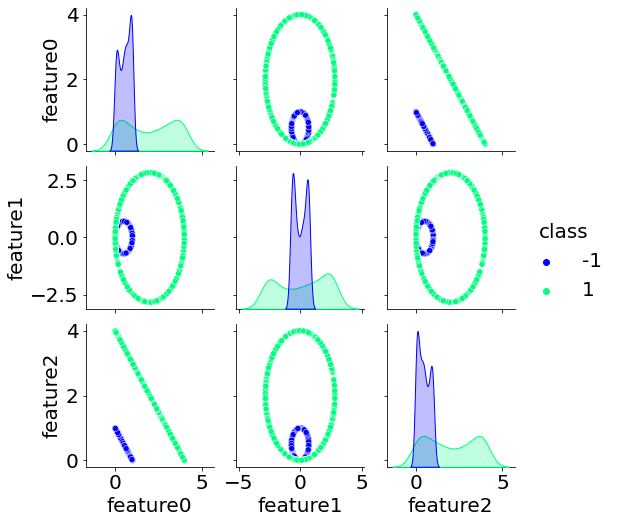

In [49]:
import seaborn as sns
sns.pairplot(z,hue ='class',palette='winter');

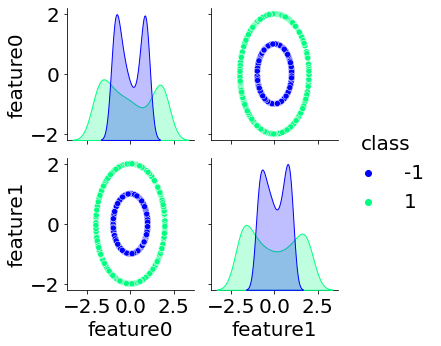

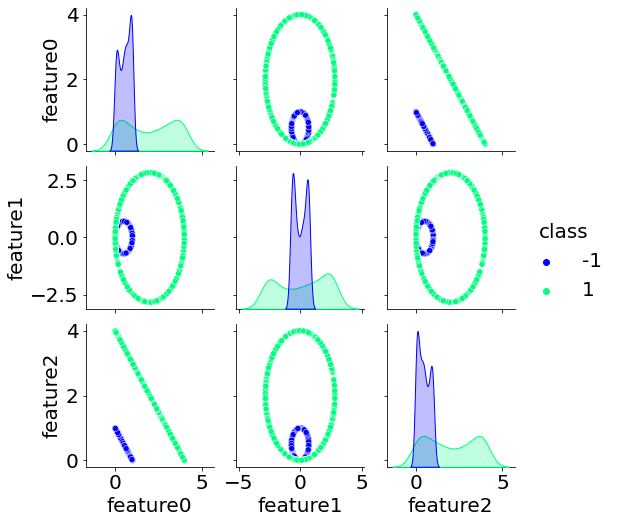

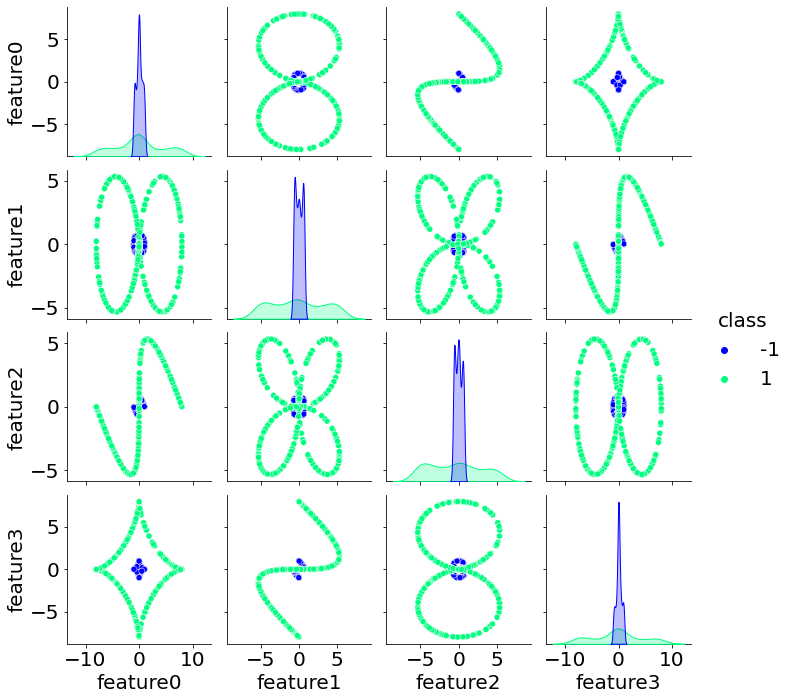

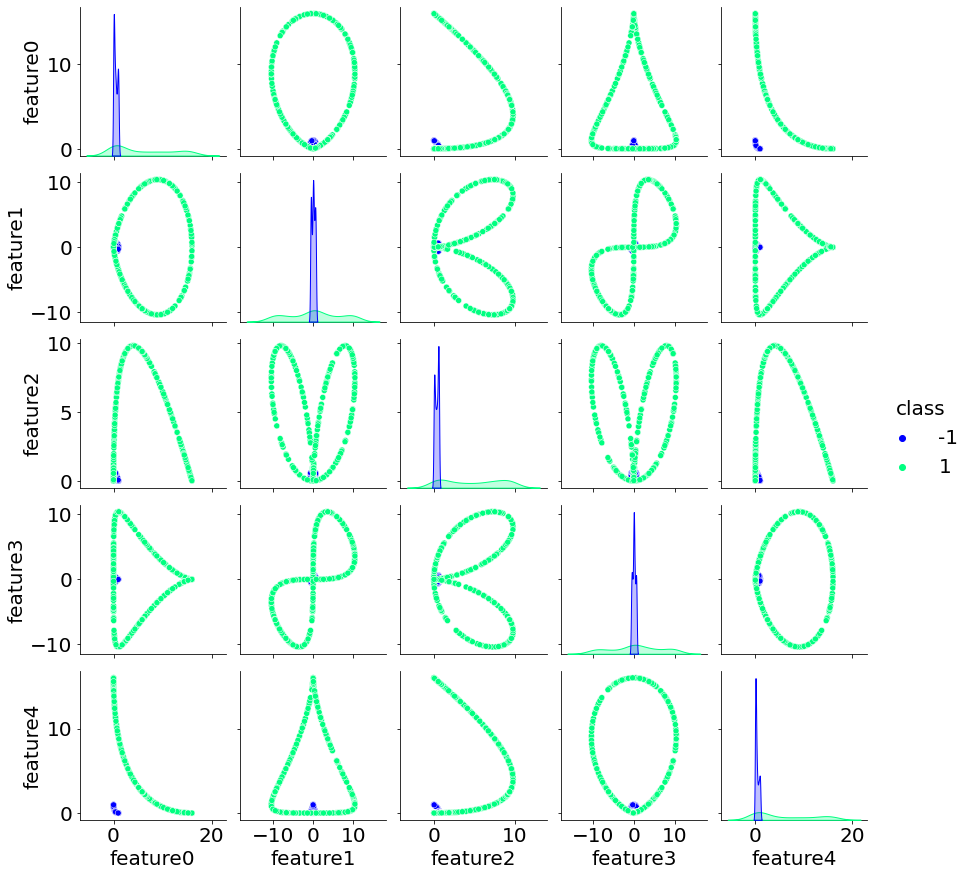

In [50]:
for d in range(1,5):
    columns=['feature'+str(i) for i in range(d+1)]
    z=pd.DataFrame(poly_feature(X,d),columns=columns)
    y=pd.DataFrame(y).rename(columns={'0':'class'})
    z=pd.concat([z,y],axis=1)
    sns.pairplot(z,hue ='class',palette='winter');

In [51]:
X=np.array([[-0.44699,-2.807],[-1.4621,-2.4586],
            [0.10645,1.9242],[-3.5944,-4.0112],
            [0.9888,4.5718],[-3.1625,-3.9606],
            [0.56421,0.72888],[-0.60216,8.4636],
            [-0.61251,-0.75345],[-0.73535,-2.2718],
            [-0.80647,-2.2135],[0.86291,2.5946],
            [-3.11108,0.15394],[-2.9362,2.5462],
            [-0.57242,-2.9915],[1.4771,3.4896],
            [-0.58619,0.37158],[0.6017,4.3439],
            [-2.1086,8.3428],[-410113,-4.353],
            [-1.9948,-1.3927],[0.35084,-0.031994],
            [0.96765,7.8929],[-1.281,15.6824],
            [0.96765,10.083],[1.3763,1.3347],
            [-2.3234,-2.5323],[-2.9452,-1.8219],
            [0.14654,-0.28733],[0.5461,5.8245],
            [-0.65259,9.3444],[0.59912,5.3524],
            [0.50214,-0.31818],[-3.0603,-3.6461],
            [-6.6797,0.67661],[-2.353,-0.72261],
            [1.1319,2.4023],[-0.12243,9.0162],
            [-2.5677,13.1779],[0.057313,5.4681]
            ])
y=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

sample2_X=X
sample2_y=y


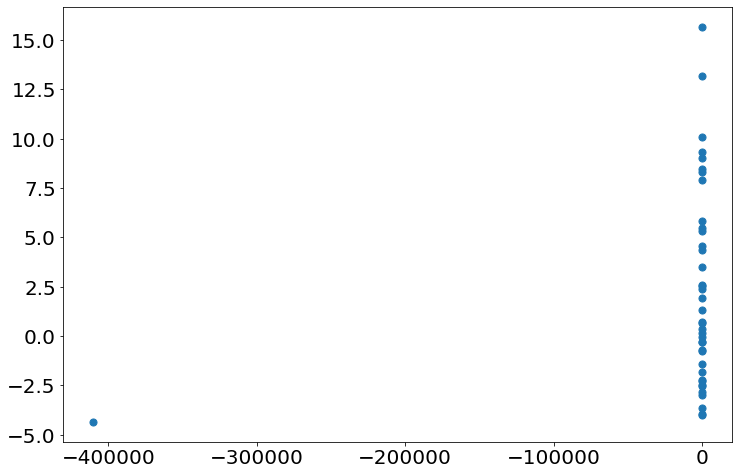

In [52]:
fig=plt.subplots(figsize=(12,8))
plt.rcParams["font.size"]=20
plt.scatter(sample2_X[:,0],sample2_X[:,1],s=50);

In [53]:

X_train2,X_valid2,y_train2,y_valid2=\
train_test_split(X, y, train_size=0.8,random_state=0)
print('X_train2.shape',X_train2.shape)
print('y_train2.shape',y_train2.shape)
print ('X_valid2.shape',X_valid2.shape)
print('y_valid2.shape',y_valid2.shape)

X_train2.shape (32, 2)
y_train2.shape (32,)
X_valid2.shape (8, 2)
y_valid2.shape (8,)


In [54]:
clfnp_polly=ScratchSVMClassifierNumpy(num_iter=100,lr=0.01,threshold=1e-5)
clfnp_polly.fit(X_train2,y_train2)
y_pred_clfnp_polly=clfnp_polly.predict(X_valid2)

In [55]:
accuracy=accuracy_score(y_valid2,y_pred_clfnp_polly)
precision=precision_score(y_valid2,y_pred_clfnp_polly)
recall=recall_score(y_valid2,y_pred_clfnp_polly)
f1=f1_score(y_valid2,y_pred_clfnp_polly)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.5
precision 0.5
recall 0.75
f1 0.6


In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
plt.rcParams["font.size"]=20
print('Number of support_vector:',clfnp_polly.n_support_vectors)
decision_region(X_train2,y_train2,clfnp_polly,title='TRAIN',target_names=['-1','1'])
plt.scatter(X_valid2[:,0] ,X_valid2[:,1],s=80,label='valid')
plt.legend();

Number of support_vector: 28
